## SIMPLE REAL ESTATES PRICE PREDICTOR

## Model to predict the prices of new buildings/flats, using the the prices of old building and their features.

In [1]:
import pandas as pd

## Loading the main data file.

In [2]:
housing = pd.read_csv("data.csv")

## Getting the top 5 rows in the table

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Getting info about the loaded data.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Checking the frequency of a particular value in CHAS column

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Looking the values contained in different rows of the LSTAT column

In [6]:
housing['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

## Describing the imported data.
## The description contains the following data.
    # Count -> Number of occurences [It ignores NULL values]
    # Mean  -> Mean of all row values.
    # STD   -> Standard Deviation of all the row values (How far the current value if row is,from MEAN)
    # Min   -> Minimum value in all the rows of a specific column.
    # Max   -> Minimum value in all the rows of a specific column.
    
## The numbers with % are percentile.
    # 25%   -> 25% values in that row are less than the mentioned value.
    # 50%   -> 50% values in that row are less than the mentioned value.
    # 75%   -> 75% values in that row are less than the mentioned value.

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283701,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705184,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Telling that we need to use matplotlib right now and then importing it.

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

# Making a histogram of the impoted data using matplotlib

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

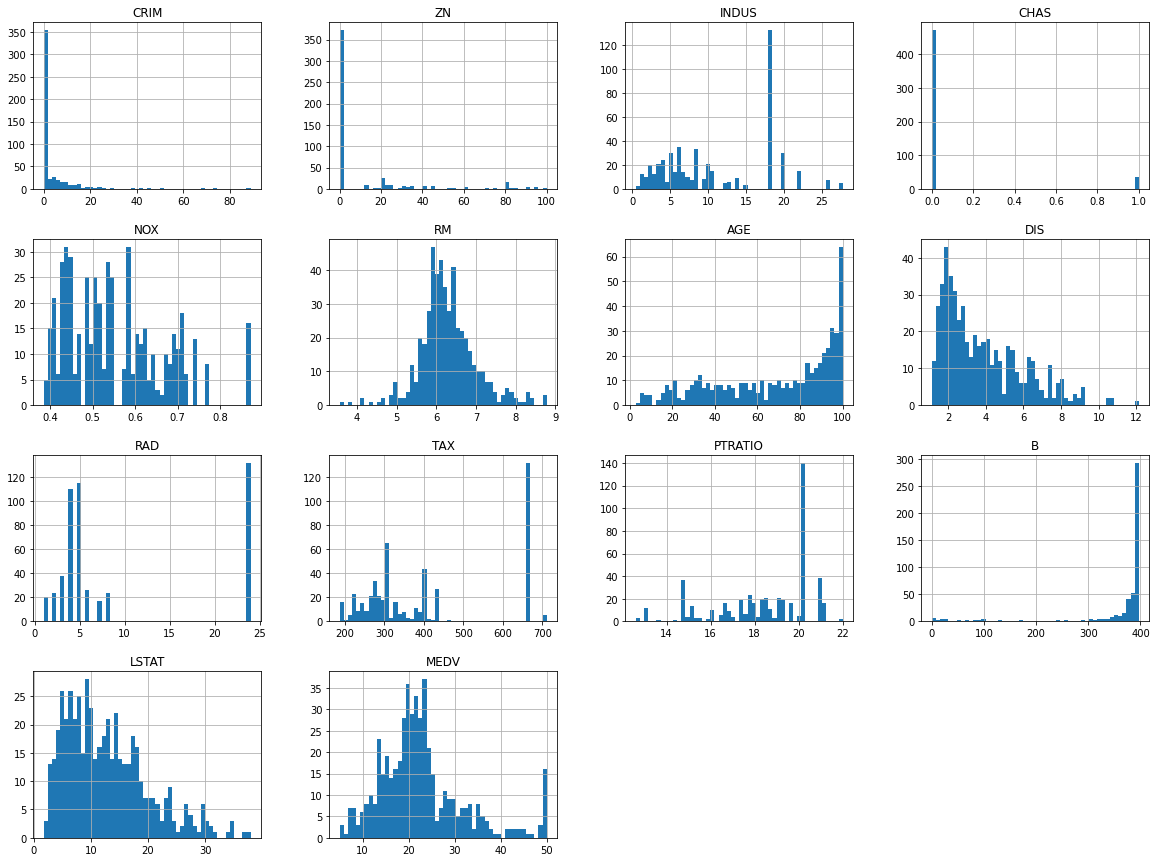

In [10]:
housing.hist(bins = 50, figsize = (20, 15))

## Splitting the training data and test data (can also be done using sklearn)
    The basic idea is to divide the data into 1:4 ratio where 20% is the test data and 80% is the
    training data.


In [11]:
# For learing the internal implementation in sklearn
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)                            # setting up the seed to make sure the values gets fixed.
#     shuffled = np.random.permutation(len(data))   # randomizing the data.
#     test_set_size = int(len(data) * test_ratio)   # setting up the test data size (20% in this case)
#     test_indices = shuffled[:test_set_size]       # pulling the 20% shuffled data & storing in test_indices
#     train_indices = shuffled[test_set_size:]      # pulling the 80% shuffled data & storing in train_indices
#     return data.iloc[train_indices], data.iloc[test_indices]  #returning the separated data

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)  # 0.2 indicates 20%

In [13]:
# print(f"Rows in train set : {len(train_set)}\n")
# print(f"Rows in test set : {len(test_set)}\n")

## The above written splitting mechanism is also present in sklearn so we will implement the sklearn spliltting also.
    The difference in train_set length and test_set length is due to rounding off factor. (should be ignored)

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)}\n")
print(f"Rows in test set : {len(test_set)}\n")

Rows in train set : 404

Rows in test set : 102



# Using sklrean to split the training and test data strategically
    In the CHAS column, there are 471 rows having 0 and 35 rows have value 1. Now while splitting the data all the 35 rows having the value 1 gets into training set or in the test set, then it out model will have errors. Let's consider that CHAS column is very important to make predictions. 
    So we will split that column "STRATEGICALLY". For that we will use sklean.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)  #basic data to splitter(same as above)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Checking the count of CHAS in train and test set

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

    Checking the raatio of CHAS

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

## Now the training dataset is ready and is stored in "strat_train_set" we have to train the model using it only. 
## So changing the "housing" to training data

In [20]:
housing = strat_train_set.copy()

# Looking for Correlations
    This is an important step. Here we are finding the correlation between various coloums. Correaltion means that how a particular column value will vary if the value of certain thing is changed.
    
    The correlation value lies between -1 to +1, where -1 means strong -ve correlation i.e. if the value is 
    decreased then main value will increase and vice versa and +1 means strong +ve correlation i.e if the value is increased then the main value will also increase

In [21]:
corr_matrix = housing.corr()

In [22]:
# MEDV is the price colums (so it is +1, strong +ve correlation)
# RM is the no of rooms (so it is 0.695360, indicating a +ve correlation)
# This makes sense as more the rooms, higher the price

# CRIM is per capita crime rate of the town (it's correlation is -0.388305)
# This also makes sense as lower the crime rate, higher the price of buildings.

corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679654
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Plotting the correlation
    In the graph below, we look for strainght lines. A straight line in the left diagonal (0,0) indicates a strong +ve correlation and a straight line in the right diagonal indicates a strong -ve correlation.
    
    In MEDV vs RM plot, we see a strong +ve correlation and in MEDV vs LSTAT plot we see a strong -ve correlation.

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

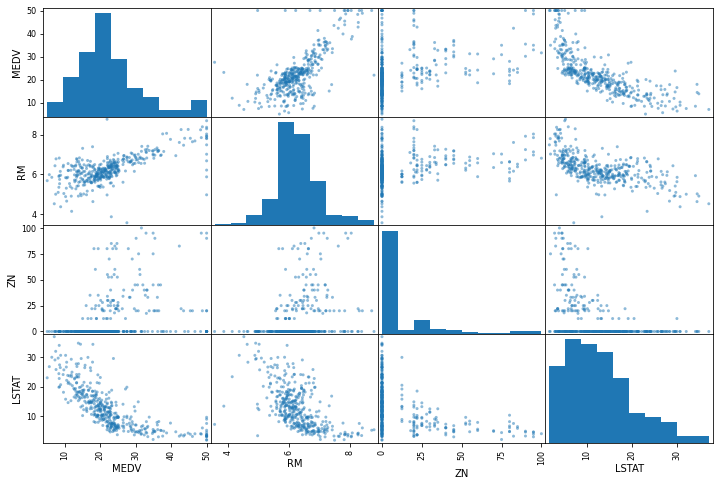

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

## Viewing a  single plot in a bigger area
    We 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

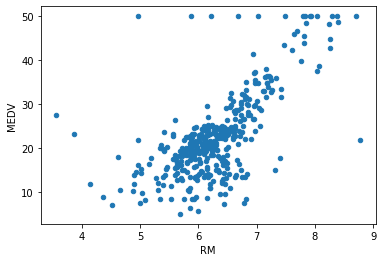

In [24]:
housing.plot(kind = "scatter", x = "RM" , y = "MEDV", alpha = 1.0)

## Trying out different attribute combinations
    We are trying to find the ratio of TAX and RM
    TAX -> full-value property-tax rate per 10,000 dollars
    RM  -> average number of rooms per dwelling


In [25]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


## Again checking the correlation with MEDV
    Here we see a strong negative correlation of our new arrtibute with MEDV.

In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679654
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526748
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

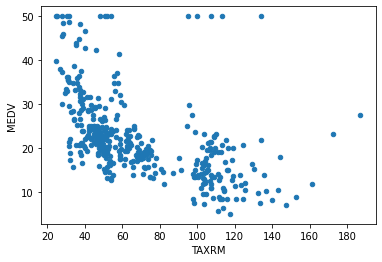

In [28]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 1.0)

# NOTE
## Both of the training and test dataframe does not have the custom attribute. "TAXRM", because adding them in the main dataframe will harm the model.

In [29]:

# Already copied the training set in the housing dataframe
# But the task of the model is to predict the prices of the buildings.
# So we will drop the price column i.e. "MEDV" from the training dataframe
housing = strat_train_set.drop("MEDV", axis = 1)    # axis = 1 means from column
housing_labels = strat_train_set["MEDV"].copy()

# Handling Missing Attributes
    When a column has certain missing(N.A.) values then it might create problems while training the model.
    To avoid that we can do three operations
    1) Get rid of the missing data points (removing that particular row)
    2) Get rid of the whole attribute (removing the complete column)
    3) Set the N.A. values to (0, Mean or Median of that columns)

In [30]:
# note that 3rd and 5th row has N.A. values.
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95


In [31]:
# Using Option 1 (deleting the row having N.A)
# this doesnot changes the main dataframe
# Note how the 3rd and 5th rows are deleted (not from the dataframe)
droppedNa = housing.dropna(subset = ["RM"])

In [32]:
droppedNa.shape  # Node in the outut that 5 rows are deleted

(399, 13)

In [33]:
housing.shape    # Originally we had 506 rows and 15 columns

(404, 13)

In [34]:
# Using Option 2 (delete the whole RM column)
housing.drop(["RM"], axis = 1)  # Axis = 1 means column and 0 means row

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [35]:
# Using Option 3 (filling the empty cells with 0, Mean or Median)

median = housing["RM"].median()  # getting the median of the column
housing["RM"].fillna(median)     # filling the N.A cells with median

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
#before we started filling missing arributes using sklearn
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278677,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716280,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Using sklearn to perform the above actions of filling the N.A cells with median/mode/0 values.

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)  # fitting the imputer into the housing data

SimpleImputer(strategy='median')

In [38]:
# looking at the medians generated by the imputer
imputer.statistics_   

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
# this is a numpy array (we have to convert it into a datafram later on)
newData = imputer.transform(housing)  

In [40]:
# housing_tr has the new dataframe
# the previous dataframe "housing" is still intact
housing_tr = pd.DataFrame(newData, columns = housing.columns)

# one liner of previous 2 steps :-)
# housing_tr = pd.DataFrame(imputer.transform(housing) , columns = housing.columns)

In [41]:
# checking the new dataframe with imputed cells
housing_tr.describe()   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277814,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711865,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [42]:
#old data frame (note the RM value)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278677,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716280,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn design
    Primarily there are three types of objects in sklearn
    1) Estimators :- They estimates some paramater based on a dataset. Eg. IMPUTER. It has a fit method and transform method. 
    Fit Method fits the dataset and calcualtes internal parameters.
    
    2) Transformers :- They takes inout and returns output based in the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms the data.
    
    3) Predictors :- Linear Regression model ins an example of predictor. Fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling
    The predictions made by different ML algorithms are accurate when, the values of X and Y columns(in histogram)
    are within the same range. 
    So to scale the data for better predictions there are two types of scaling methods.
    
    1) Min-Max Scalingn (Normalization)
       (value - min)/(max - min)
       To do this sklearn has a class called MinMaxScaler.
    
    2) Standardization
        (value - mean)/std
        To do this sklearn has class called StandardScaler.

# Creating a pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

In [44]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real  Estates

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [46]:
some_data = housing.iloc[:5]

In [47]:
some_labels = housing_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)   # passing the data through pipeline

In [49]:
model.predict(prepared_data)  # getting the prediction array

array([22.185, 25.538, 16.382, 23.411, 23.474])

In [50]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse    # mse will be zero if our model has overfitted

1.2293177442535477

# Using better evaluation technique -> Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([2.91393276, 2.89018793, 4.62365463, 2.61670237, 3.18869931,
       2.6371985 , 4.38456073, 3.4077518 , 3.17188732, 3.00720827])

In [55]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [56]:
print_scores(rmse_scores)

Scores :  [2.91393276 2.89018793 4.62365463 2.61670237 3.18869931 2.6371985
 4.38456073 3.4077518  3.17188732 3.00720827]
Mean :  3.2841783616187867
Standard Deviation :  0.6538473670825597


# Saving the model

In [57]:
from joblib import dump, load
dump(model, "Simple.joblib")

['Simple.joblib']

# Testing the model

In [58]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()

X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

2.97003301790586

In [60]:
# Taking a portion of prepared data to test the model
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23884433, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [61]:
from joblib import dump, load
import numpy as np
model = load("Simple.joblib")

features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23884433, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)


array([22.185])